In [169]:
import pandas as pd
import matplotlib.pyplot as plt

In [181]:
info = pd.read_csv('scores (3) (2).csv')

In [183]:
epoches = []
i = 1000000
while i != -100000:
    e = [i] * 7
    i -= 100000
    epoches.extend(e)
info['epoche'] = epoches

In [193]:
info

,Unnamed: 0,layer,accuracy,precision,recall,f1-score,epoche
0,0,0,0.779482,0.796847,0.753053,0.774331,1000000
1,1,1,0.795558,0.806411,0.780410,0.793198,1000000
2,2,2,0.803043,0.813555,0.788715,0.800943,1000000
3,3,3,0.806725,0.819103,0.789692,0.804129,1000000
4,4,4,0.824886,0.832295,0.815828,0.823979,1000000
...,...,...,...,...,...,...,...
72,2,2,0.698981,0.712951,0.670982,0.691330,0
73,3,3,0.698491,0.710682,0.674402,0.692067,0
74,4,4,0.688551,0.701554,0.661456,0.680915,0
75,5,5,0.685851,0.698808,0.658525,0.678068,0


In [196]:
layer = info.iloc[:7]['layer']

datasets = []

for i in range(0,len(info), 7):
    dataset = info.iloc[i:i+7, 2:6]
    
    datasets.append([dataset[i].to_list() for i in dataset.columns])

In [197]:
datasets = datasets[::-1]

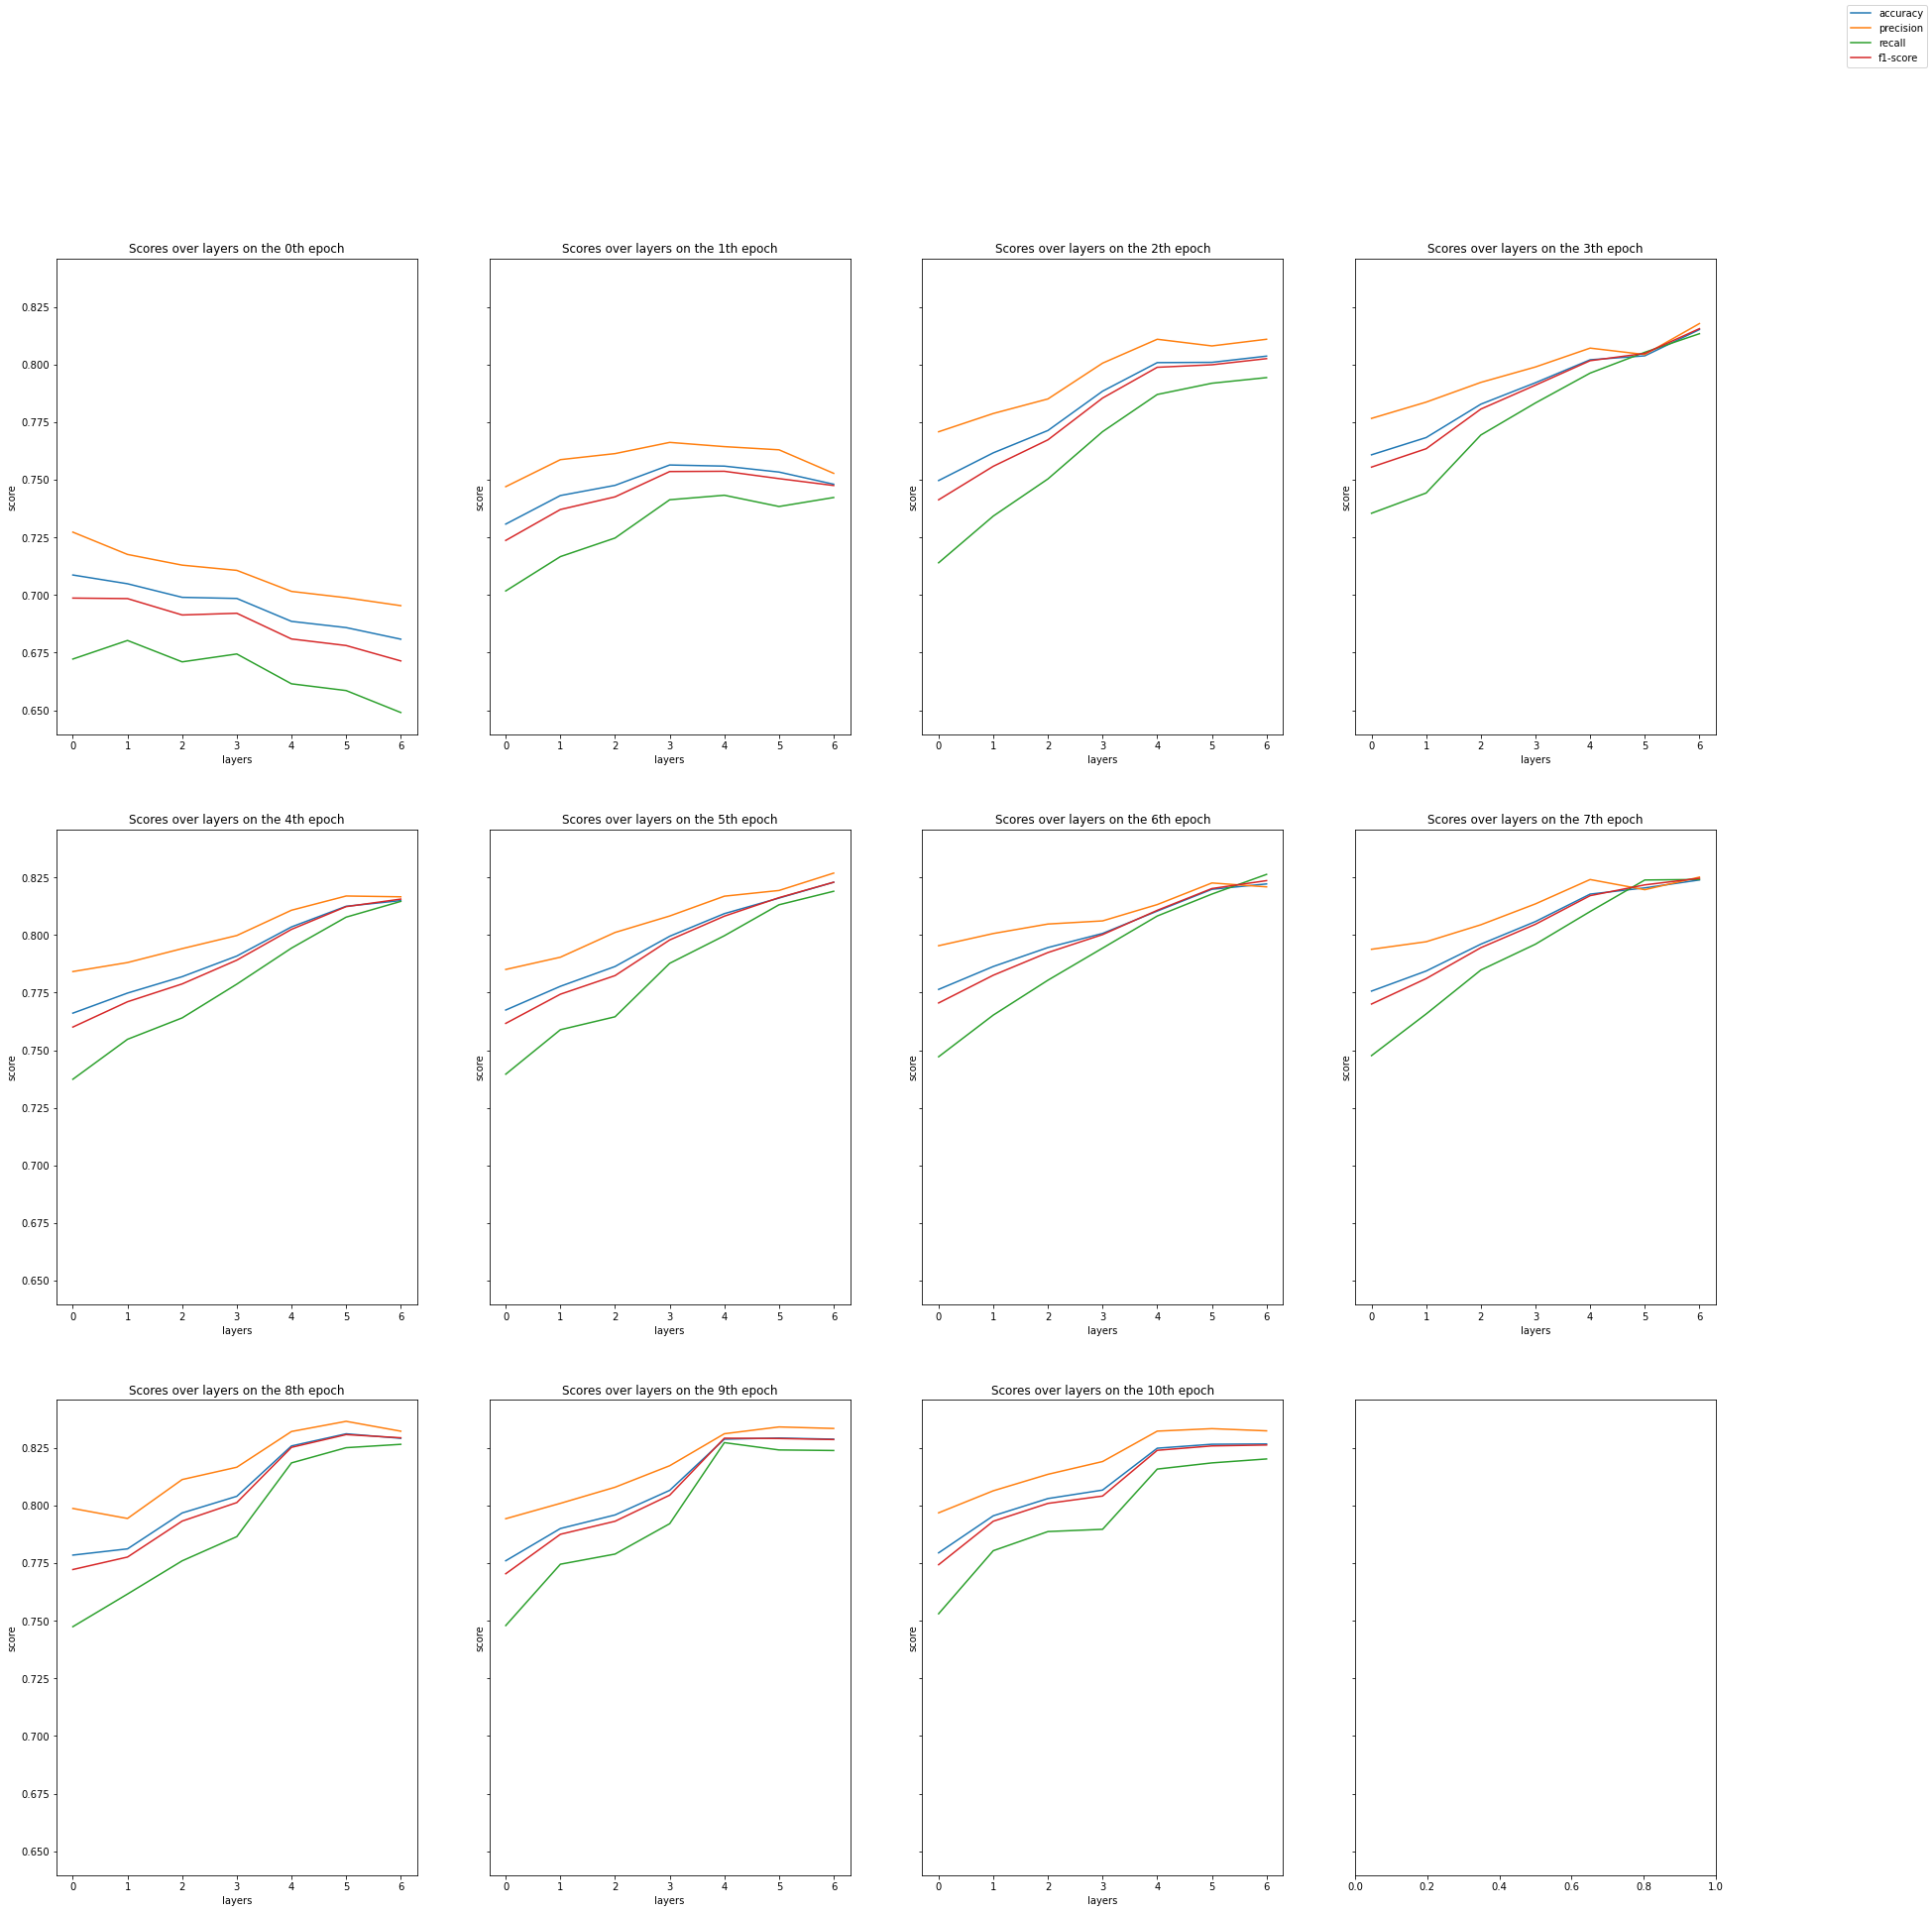

In [204]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(30, 30), sharey=True)

x = 0
j = 0
for i, df in enumerate(datasets):
    for l in df:
        layers = ax[x, j].plot(layer, l)
        layers = ax[x, j].set_xlabel('layers')
        layers = ax[x, j].set_ylabel('score')
        layers = ax[x, j].set_title(f'Scores over layers on the {i}th epoch')
    if j != 3:
        j += 1
    else:
        j = 0
        x += 1

fig.legend(labels=['accuracy', 'precision', 'recall', 'f1-score'])
plt.show()

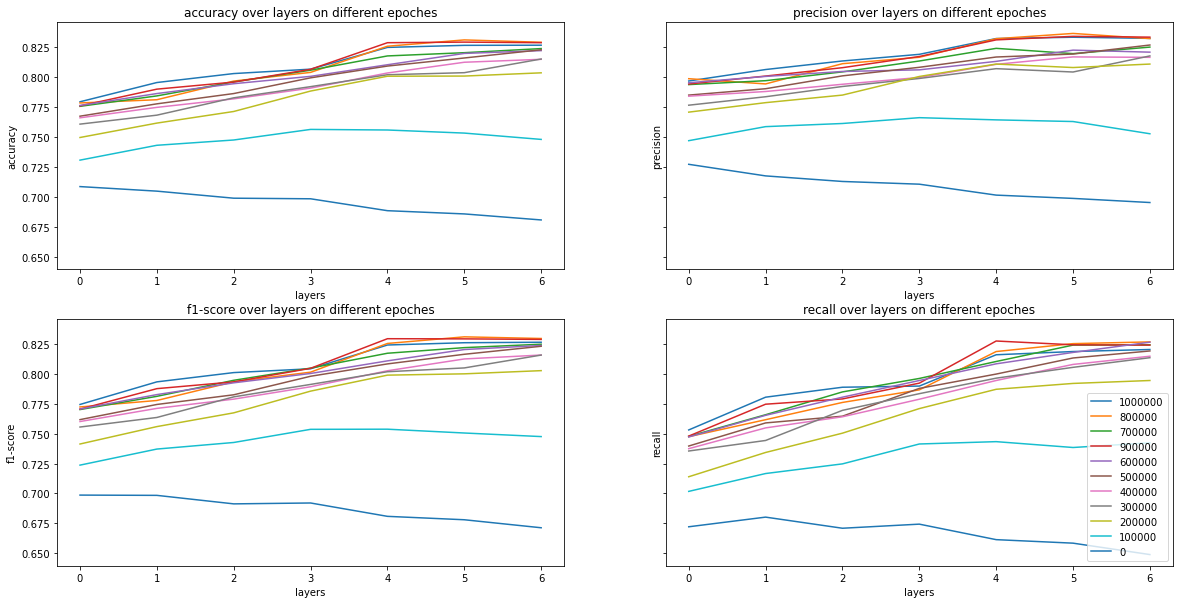

In [194]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 10), sharey=True)
row = 0
col = 0
epoches = set(info['epoche'])
for column in info.columns[2:6]:
    for i in epoches:
        dataframe = info[info['epoche'] == i][column]
        sc = ax[row, col].plot(layer.to_list(), dataframe, label=i)
        sc = ax[row, col].set_xlabel('layers')
        sc = ax[row, col].set_ylabel(column)
        sc = ax[row, col].set_title(f'{column} over layers on different epoches')
    if col != 1:
        col += 1
    else:
        col = 0
        row +=1

plt.legend()
plt.show()